[back](./03B-classification-and-regression.ipynb)

---
## `Association and Correlation`

Association, Correlation and Covariance are all important topics out of which, we have already seen how to obtain correlation from a DataFrame

### `Initial Setup`

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns  # Library used to print nicer charts and visualizations
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv(r'../../assets/single_family_home_values.csv')
df.head(4)


,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.76078,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073


In [3]:
# X will be all the columns, without estimated_value
X = df.drop('estimated_value', axis=1)
X = X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'priorSaleAmount']]
X.fillna(0, inplace=True)
X.head()


,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0


In [4]:
y = df.estimated_value


### `Correlation`

If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship.

We can generate correlation for a dataset using `.corr()` function

- This is a **square matrix**
- Having all the **numerical fields** that we have in the dataset
- Correlation is going to range from **-1 to 1**

In [5]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,1.000000,-0.007972,-0.092638,0.039591,0.076366,0.128491,0.094063,0.143069,0.045336,0.041342,0.069275,0.012363,0.126193
zipcode,-0.007972,1.000000,0.461953,0.394500,-0.018420,-0.007543,0.031346,0.000812,-0.037696,-0.174142,0.032898,0.033123,0.089104
latitude,-0.092638,0.461953,1.000000,0.499432,-0.083083,-0.237716,-0.213634,-0.256475,-0.092881,-0.105518,-0.126800,-0.225513,-0.266116
longitude,0.039591,0.394500,0.499432,1.000000,0.022375,0.107666,0.026108,0.067845,0.066228,0.060827,0.036747,0.097487,0.121984
bedrooms,0.076366,-0.018420,-0.083083,0.022375,1.000000,0.505931,0.712343,0.620965,0.158497,-0.061681,0.135036,0.211982,0.369125
bathrooms,0.128491,-0.007543,-0.237716,0.107666,0.505931,1.000000,0.686296,0.804179,0.259073,0.194597,0.296577,0.453678,0.715926
rooms,0.094063,0.031346,-0.213634,0.026108,0.712343,0.686296,1.000000,0.771194,0.175949,-0.047720,0.230537,0.370929,0.581023
squareFootage,0.143069,0.000812,-0.256475,0.067845,0.620965,0.804179,0.771194,1.000000,0.369244,0.115298,0.334441,0.506272,0.824506
lotSize,0.045336,-0.037696,-0.092881,0.066228,0.158497,0.259073,0.175949,0.369244,1.000000,0.285517,0.193421,0.226043,0.456539
yearBuilt,0.041342,-0.174142,-0.105518,0.060827,-0.061681,0.194597,-0.047720,0.115298,0.285517,1.000000,0.077553,0.113356,0.174430


We can actually convert this into a `heatmap` for visualization using `seaborn`

<AxesSubplot:>

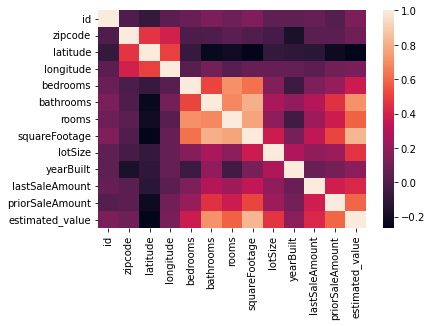

In [6]:
sns.heatmap(df.corr())

We can see that in the diagonal, it is `light` where the correlation is on itself

And some of the `darker` points where there is very less correlation

### `Covariance`

> What is covariance and what is the difference between correlation and covariance?

- Covariance is the **non-standardized** form of correlation, so correlation is derived from covariance.
- We usually get the covariance first and then **standardize** it to become -1 to 1
- However, covariance can be any value, but it captures the `variance` of what the relationship is between one feature to another feature

In [7]:
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


Whenever we have to pick the features, we can use this to understand the correlation and decide the best features.

For example, if we consider **estimated_value**, we can see that the best set of features would be _bathrooms, squareFootage, rooms and priorSaleAmount_

Another reason for using this is for detecting the **outliers**. 

### `Understanding and Removing Outliers`

So, when we are looking at a new dataset, we want to have a good understanding of what the outliers are.

In the previous chapter, the linear regression model which could have been very distorted just because of a few outliers because we are trying to fit a line into a dataset and if there are few outliers which are very far away from majority of the data points, then it is very likely that this line we're trying to fit gets lifted by these outliers.

So, it is very important to know the outliers and either drop / remove these outliers or impute them using mean or median.

So now, we'll take a look at how we detect these outliers and remove them

In [8]:
# We have our X, which is the feature set
X

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0
...,...,...,...,...,...,...,...
14995,4,4.0,8,2169,4950,1922.0,0.0
14996,3,3.0,11,2937,4500,1890.0,557500.0
14997,3,5.0,7,2937,4680,2007.0,1208214.0
14998,3,4.0,10,3193,4970,2005.0,405000.0


In [9]:
# y which is the estimated_value of a property
y


0         239753
1         343963
2         488840
3         494073
4         513676
          ...   
14995    1080081
14996     807306
14997    1737156
14998    2008794
14999    1421401
Name: estimated_value, Length: 15000, dtype: int64

In [10]:
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

Now, for all of the column headers in our feature set, we'll loop through it and try to build a histogram along with that print the mean and standard deviation

And based on these histograms, we can see where most of the values lie for a particular feature and try to set our limit to eliminate the outliers

bedrooms
mean:  2.7084
std:  0.8972307998543382


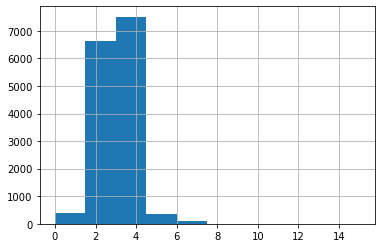

bathrooms
mean:  2.1950666666666665
std:  1.1662788442928953


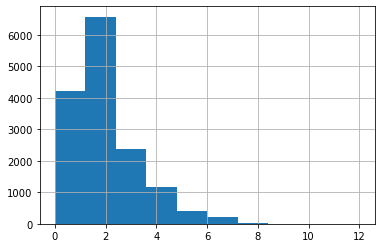

rooms
mean:  6.164133333333333
std:  1.958600518215801


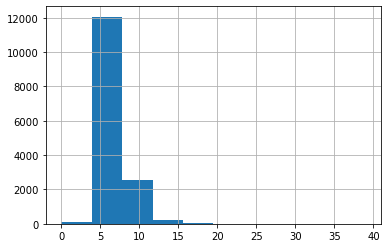

squareFootage
mean:  1514.5044
std:  830.6359987331762


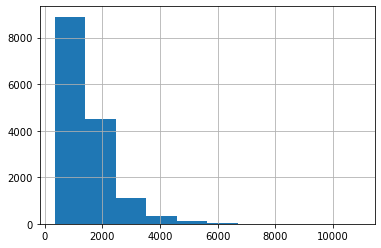

lotSize
mean:  5820.7662
std:  3013.279470369183


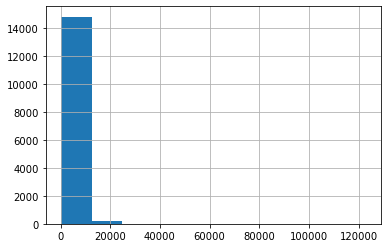

yearBuilt
mean:  1929.3885333333333
std:  33.82853430411162


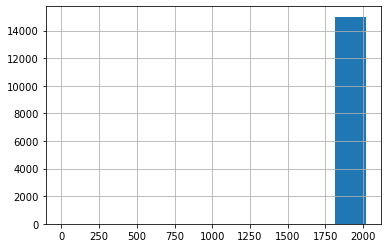

priorSaleAmount
mean:  195216.20066666667
std:  313797.90664518543


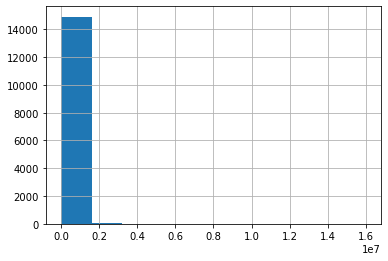

In [11]:
for col in X.columns:
  print('='*80)
  print(col)
  X.loc[:, col].hist() # for all the rows, and current column in the iteration, get the histogram
  print('mean: ', X.loc[:, col].mean())
  print('std: ', X.loc[:, col].std())
  plt.show()


Now, we'll work towards removing the outliers

In [12]:
# remove or drop outliers (by filtering the records we need) based on conditions
X2 = X[X.bedrooms < 7]


<AxesSubplot:>

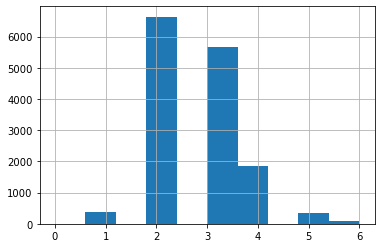

In [13]:
X2.bedrooms.hist()

In [14]:
# Removing outliers (by filtering the records we need) from multiple features at once
X3 = X[(X.bedrooms < 7) & (X.bathrooms < 7)]

<AxesSubplot:>

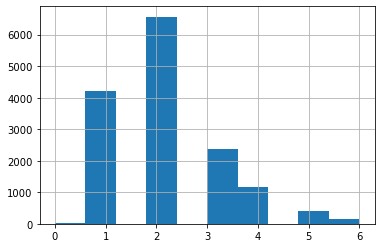

In [15]:
X3.bathrooms.hist()

#### `Alternate ways to identify and remove outliers`

<AxesSubplot:>

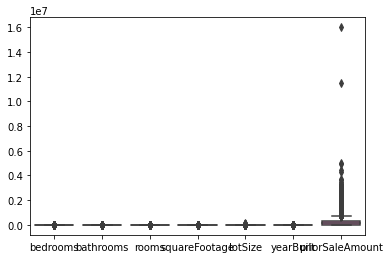

In [16]:
# Seaborn - Boxplot

sns.boxplot(data=X)

We see that **priorSaleAmount** is skewing the result, so we'll remove that and check the boxplot again

<AxesSubplot:>

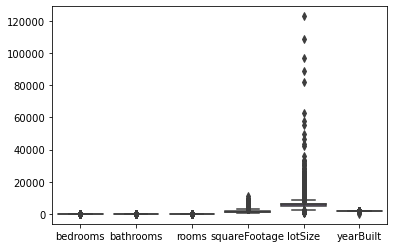

In [17]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms',
            'squareFootage', 'lotSize', 'yearBuilt']])


We see that now **lotSize** is still somewhat skewing the result, so we'll remove that and see the boxplot

<AxesSubplot:>

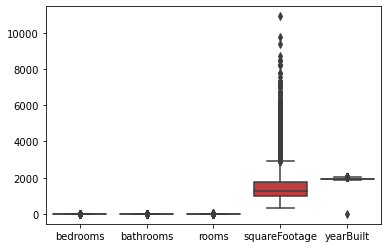

In [18]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms',
            'squareFootage', 'yearBuilt']])


Same is with **squareFootage**

<AxesSubplot:>

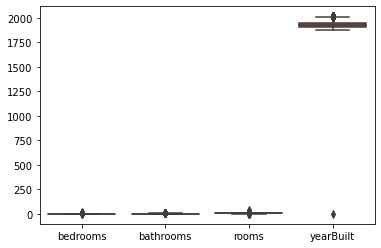

In [19]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms', 'yearBuilt']])


and with **yearBuilt** removed

<AxesSubplot:>

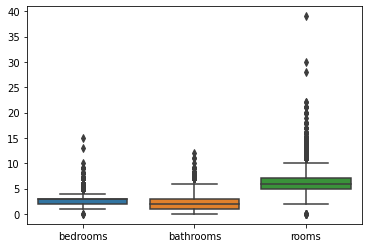

In [20]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms']])


We now see that in rooms, anything above 20 or 25 may be considered as outliers.

Typically what people do is, they will use somewhere from 25pctl to 75pctl, so that we can include the data points that belong to that range. But we can surely be flexible at picking it.

So, comparing the value we've picked for bathroom and bedroom i.e., 7 seems to be a good cutoff based on the above chart and for rooms, may be 20 will be a good cutoff value.

So, now, we'll go back and see the other features we didn't include.

<AxesSubplot:>

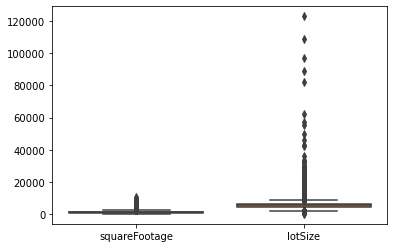

In [21]:
sns.boxplot(data=X[['squareFootage', 'lotSize']])


Definitely there are many outliers in **lotSize**, may be anything more than 50k would be an outlier. So first, lets just look at the **squareFootage**

<AxesSubplot:>

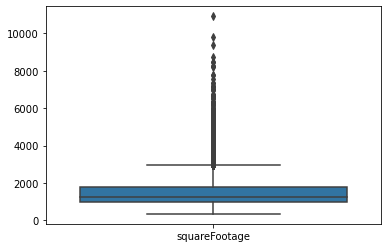

In [22]:
sns.boxplot(data=X[['squareFootage']])


And seeing this, we can consider 4k as the cutoff, and now see the **lotSize**

<AxesSubplot:>

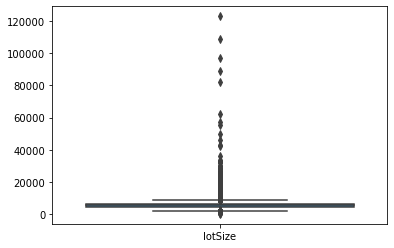

In [23]:
sns.boxplot(data=X[['lotSize']])

And here, anything above 40k should be a good cutoff.

We can definitely go on and check the features individually and decide the cutoff or we can also have a combined view of more than one variable test where to draw the line to cutoff the outliers.

### `Conclusion`

At some scenario, if there are too many outliers, it could be just that we need to reposition the problem into **outlier** or **anomaly detection** and perhaps we can have two models.

One is the model that we will be going to use for major data points or major scenarios and another one for the outliers. So we can have two models and each will have it's own purpose.

---
[next](./03D-dimensionality-reduction.ipynb)